In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
Y = pd.Series(cancer.target, name='target')
print("Preview of the first few rows in the features:\n", X.head())
print("\nDistribution of the target values:\n", Y.value_counts())

Preview of the first few rows in the features:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius

In [3]:
print(X.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [4]:
print(X.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
print("Feature occurrence counts: \n", X.value_counts())
print("\nTarget distribution (percentage): \n", Y.value_counts(normalize=True) * 100)

Feature occurrence counts: 
 mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  radius error  texture error  perimeter error  area error  smoothness error  compactness error  concavity error  concave points error  symmetry error  fractal dimension error  worst radius  worst texture  worst perimeter  worst area  worst smoothness  worst compactness  worst concavity  worst concave points  worst symmetry  worst fractal dimension
6.981        13.43         43.79           143.5      0.11700          0.07568           0.00000         0.00000              0.1930         0.07818                 0.2241        1.5080         1.553            9.833       0.010190          0.010840           0.00000          0.000000              0.02659         0.004100                 7.93          19.54          50.41            185.2       0.1584            0.12020            0.00000          0.000

In [6]:
correlation_matrix = X.corr()
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
                          mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture

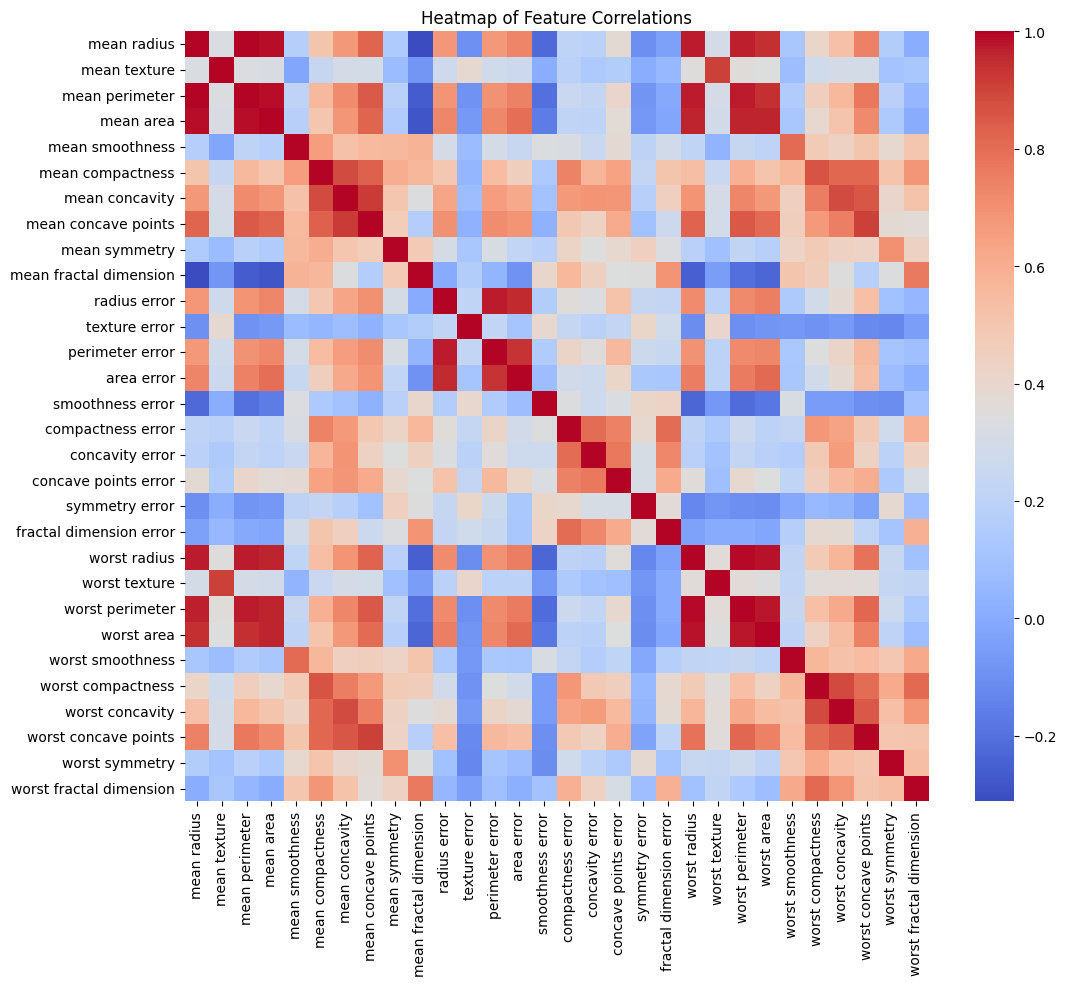

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

Examine the distributions of key features to gain insights into their behavior.

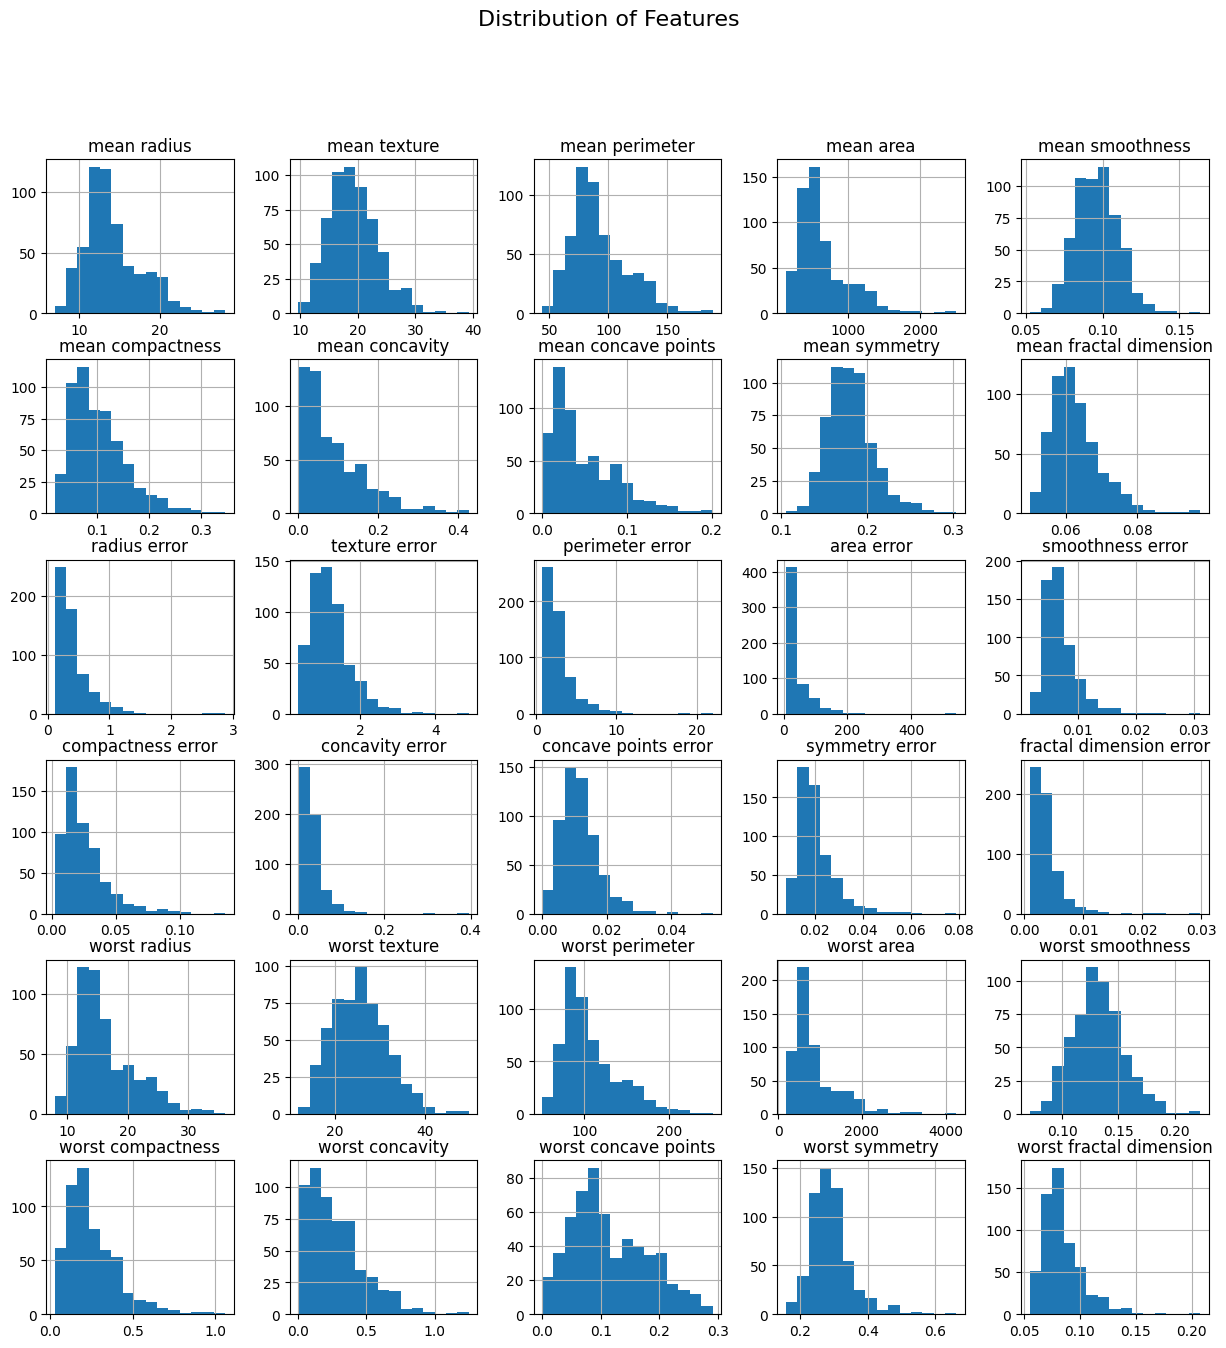

In [8]:
X.hist(bins=15, figsize=(15, 15))
plt.suptitle('Distribution of Features', fontsize=16)
plt.show()

Generate a pairplot using Seaborn to gain a comprehensive overview of the relationships between multiple features.

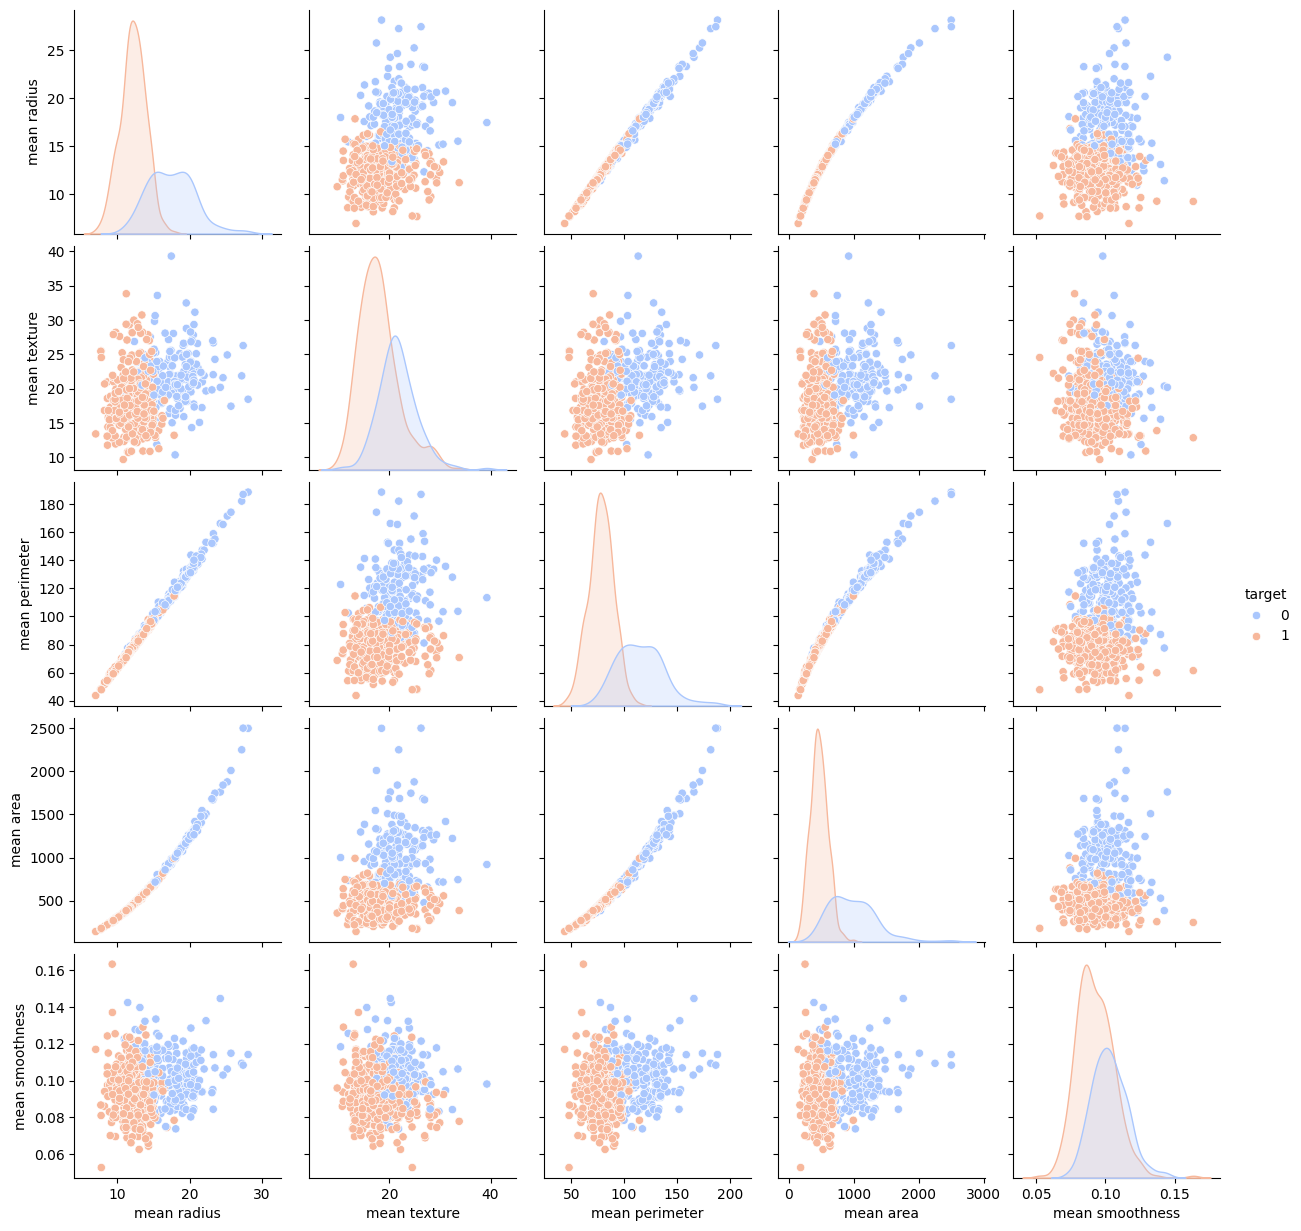

In [9]:
data = pd.concat([X, Y], axis=1)
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
sns.pairplot(data, vars=selected_features, hue='target', diag_kind='kde', palette='coolwarm')
plt.show()

By examining these pair plots, you can gain deeper insights into the relationships between features and how they might aid in classifying breast cancer as benign or malignant.

Identify outliers to detect anomalies or unusual data points in the dataset.

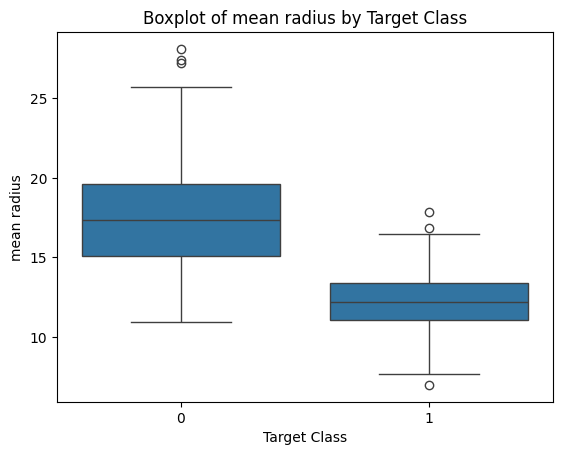

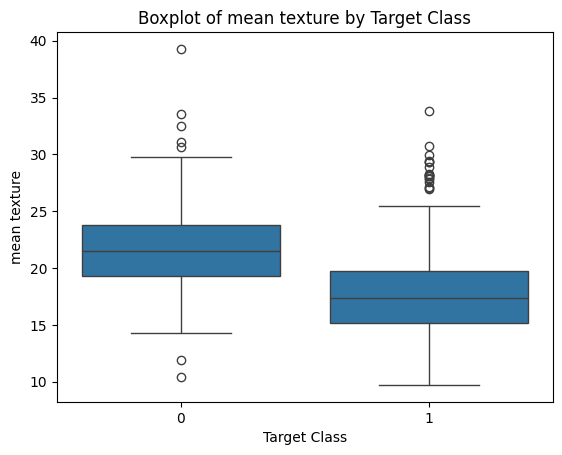

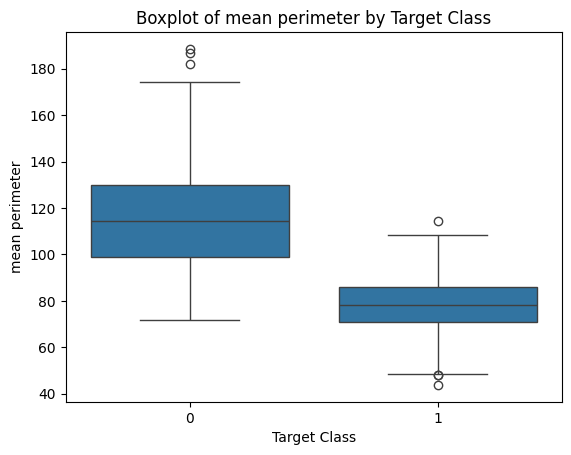

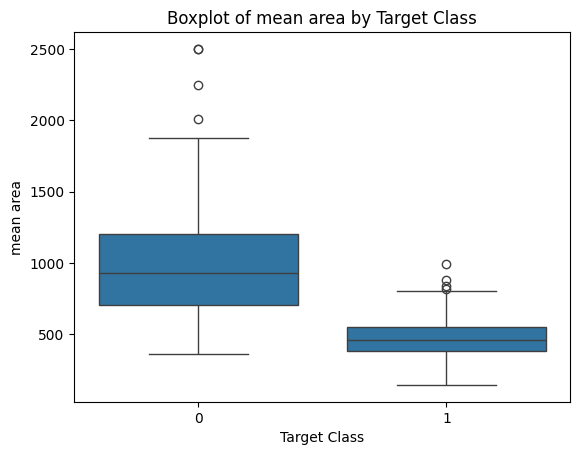

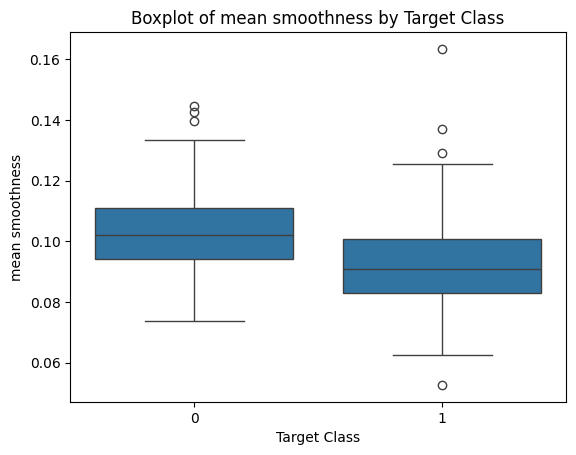

In [10]:
feature_columns = X.columns[:5]
for feature in feature_columns:
    sns.boxplot(x=Y, y=X[feature])
    plt.title(f'Boxplot of {feature} by Target Class')
    plt.xlabel('Target Class')
    plt.ylabel(feature)
    plt.show()

Identify outliers to detect anomalies or unusual data points in your dataset

In [11]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
outliers = (X < lower_bound) | (X > upper_bound)
print(outliers.sum())

mean radius                14
mean texture                7
mean perimeter             13
mean area                  25
mean smoothness             6
mean compactness           16
mean concavity             18
mean concave points        10
mean symmetry              15
mean fractal dimension     15
radius error               38
texture error              20
perimeter error            38
area error                 65
smoothness error           30
compactness error          28
concavity error            22
concave points error       19
symmetry error             27
fractal dimension error    28
worst radius               17
worst texture               5
worst perimeter            15
worst area                 35
worst smoothness            7
worst compactness          16
worst concavity            12
worst concave points        0
worst symmetry             23
worst fractal dimension    24
dtype: int64


In [12]:
new_X = X[(X >= lower_bound) & (X <= upper_bound)].dropna()
new_Y = Y[new_X.index]
print("Original feature data shape:", X.shape)
print("Feature data shape after removing outliers:", new_X.shape)
print("Original target data shape:", Y.shape)
print("Target data shape after removing outliers:", new_Y.shape)

Original feature data shape: (569, 30)
Feature data shape after removing outliers: (398, 30)
Original target data shape: (569,)
Target data shape after removing outliers: (398,)


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
print("X training data:\n", X_train)
print("\nX testing data:\n", X_test)
print("\nY training data:\n", Y_train)
print("\nY testing data:\n", Y_test)

X training data:
 [[-1.44798723 -0.45602336 -1.36665103 ...  0.91959172  2.14719008
   1.85943247]
 [ 1.97750799  1.69418666  2.08961867 ...  2.6752184   1.9368786
   2.46346488]
 [-1.40708919 -1.26351565 -1.34976305 ... -0.97048581  0.61676962
   0.05287682]
 ...
 [ 0.04621146 -0.57470379 -0.06874782 ... -1.23756033 -0.71628161
  -1.26047806]
 [-0.04183295  0.07687501 -0.03497186 ...  1.03683652  0.45013821
   1.19444266]
 [-0.5530585   0.28631105 -0.60751564 ... -0.61357437 -0.33448538
  -0.84042616]]

X testing data:
 [[-0.47069438 -0.16048584 -0.44810956 ... -0.19956318  0.18320441
   0.19695794]
 [ 1.36687747  0.47014935  1.30288585 ...  0.97897545 -0.56582801
  -1.00057787]
 [ 0.37850807  0.04429607  0.40082046 ...  0.56024403 -0.10314275
  -0.20813168]
 ...
 [-0.74050787 -1.01451947 -0.74550281 ... -0.28209134 -0.3830188
  -0.3245049 ]
 [ 0.02633046  1.99205126  0.02393013 ... -0.49358878 -1.63518099
  -0.33170895]
 [ 1.87526288  2.75300221  1.80128727 ...  0.78102969 -0.0529915

In [14]:
print("Y testing data :",Y_test)
print("Y training set :",Y_train)

Y testing data : 204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Name: target, Length: 114, dtype: int32
Y training set : 68     1
181    0
63     1
248    1
60     1
      ..
71     1
106    1
270    1
435    0
102    1
Name: target, Length: 455, dtype: int32


In [15]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predict_LR = LR.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
LR_cm = confusion_matrix(Y_test, predict_LR)
print("Logistic Regression Confusion Matrix:\n",LR_cm)

Logistic Regression Confusion Matrix:
 [[41  2]
 [ 1 70]]


In [17]:
LR_cr = classification_report(Y_test, predict_LR)
print("Logistic Regression Classification Report:\n", LR_cr)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [18]:
LR_accuracy = accuracy_score(Y_test, predict_LR)
print("Logistic Regression Accuracy:", LR_accuracy)

Logistic Regression Accuracy: 0.9736842105263158


High Accuracy: The model achieved an accuracy of 97.37%, indicating it correctly classified the majority of instances in the test set.

High Precision and Recall: Both precision and recall are high for each class, demonstrating that the model effectively detects positive cases (class 1) and minimizes false positives, which is crucial in medical contexts such as breast cancer detection.

In [19]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
predict_DT = DT.predict(X_test)
DT_cm = confusion_matrix(Y_test, predict_DT)
print("Decision Tree Confusion Matrix:\n",DT_cm)

Decision Tree Confusion Matrix:
 [[39  4]
 [ 4 67]]


In [20]:
DT_cr = classification_report(Y_test, predict_DT)
print("Decision Tree Classification Report:\n",DT_cr)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [21]:
DT_accuracy = accuracy_score(Y_test, predict_DT)
print("Decision Tree Accuracy:", DT_accuracy)

Decision Tree Accuracy: 0.9298245614035088


The Decision Tree model achieved an accuracy of approximately 94.73%, meaning it correctly classified about 93.86% of the instances in the test set. While this performance is strong, it is slightly lower compared to the Logistic Regression model's accuracy.

In [22]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)
predict_RF = RF.predict(X_test)
RF_cm = confusion_matrix(Y_test, predict_RF)
print("Random Forest Confusion Matrix:\n",RF_cm)

Random Forest Confusion Matrix:
 [[40  3]
 [ 1 70]]


In [23]:
RF_cr = classification_report(Y_test, predict_RF)
print("Random Forest Classification Report:\n",RF_cr)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [24]:
RF_accuracy = accuracy_score(Y_test, predict_RF)
print("Random Forest Accuracy:",RF_accuracy)

Random Forest Accuracy: 0.9649122807017544


The Random Forest model achieved an accuracy of 96.49%, correctly classifying approximately 96.49% of the instances in the test set. This model strikes a strong balance between complexity and performance, making it a robust choice for classification tasks. It not only delivers high accuracy but also benefits from reduced overfitting compared to a single Decision Tree model.

In [25]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, Y_train)
predict_SVM = SVM.predict(X_test)
SVM_cm = confusion_matrix(Y_test, predict_SVM)
print("SVM Confusion Matrix:\n",SVM_cm)

SVM Confusion Matrix:
 [[41  2]
 [ 1 70]]


In [26]:
SVM_cr = classification_report(Y_test, predict_SVM)
print("SVM Classification Report:\n",SVM_cr)

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [27]:
SVM_accuracy = accuracy_score(Y_test, predict_RF)
print("SVM Accuracy:",SVM_accuracy)

SVM Accuracy: 0.9649122807017544


The SVM model achieved an accuracy of 96.49%, identical to the Random Forest model's performance. This result demonstrates that the SVM performed exceptionally well, closely matching the highest-performing models and only slightly trailing behind the Logistic Regression model. The SVM is particularly effective in scenarios with well-separated classes and where maximizing the margin between classes is advantageous, making it a reliable choice for this dataset.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, Y_train)
predict_KNN = KNN.predict(X_test)
KNN_cm = confusion_matrix(Y_test, predict_SVM)
print("KNN Confusion Matrix:\n",KNN_cm)

KNN Confusion Matrix:
 [[41  2]
 [ 1 70]]


In [29]:
KNN_cr = classification_report(Y_test, predict_KNN)
print("KNN Classification Report:\n",KNN_cr)

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [30]:
KNN_accuracy = accuracy_score(Y_test, predict_RF)
print("KNN Accuracy:",KNN_accuracy)

KNN Accuracy: 0.9649122807017544


The k-NN model achieved an accuracy of 96.49%, matching the performance of both the Random Forest and SVM models. This high accuracy indicates that the k-NN model is also a strong performer. The consistent performance across multiple models suggests that the dataset is well-suited to various classification techniques, each offering competitive results.

Best Overall Model: Logistic Regression is the top performer, offering the highest accuracy along with strong precision and recall. It provides an excellent balance between accurately identifying positive cases and minimizing false positives.

Strong Competitors: Random Forest, SVM, and k-NN achieved similar high accuracy, though slightly below that of Logistic Regression. Each of these models demonstrates robust performance and offers a good balance across various metrics.

Model Choice Considerations: Logistic Regression is recommended for its high accuracy and interpretability. Random Forest, SVM, and k-NN are strong alternatives, particularly useful when robustness to outliers or handling non-linear relationships is critical. The Decision Tree model may benefit from additional tuning or pruning to enhance its performance. Ultimately, the choice of model should align with your specific application needs, balancing interpretability, performance, and robustness.